In [76]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel
from scipy.interpolate import interp1d


def my_bisection(f, a, b, tol): 
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    m = (a + b)/2
    if np.abs(f(m)) < tol:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        return my_bisection(f, a, m, tol)

### 1. Filtro pasa bajo

1828.61328125


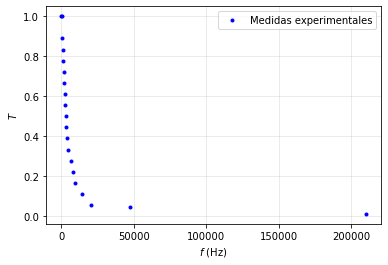

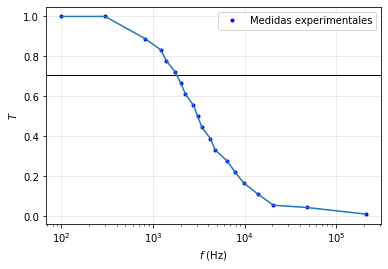

In [80]:
dfbajo = read_excel("data.xlsx", sheet_name = "bajo").to_numpy()


plt.figure(1)
plt.plot(dfbajo[:,0], dfbajo[:,2], "b.", label = "Medidas experimentales", )
#plt.errorbar(dfbajo[:,0], dfbajo[:,2], yerr = dfbajo[:,4], ls = "none")
plt.grid(alpha = 0.3)
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.legend()


plt.figure(2)
plt.plot(dfbajo[:,0], dfbajo[:,2], "b.", label = "Medidas experimentales")
plt.grid(alpha = 0.3)
plt.axhline(y = np.sqrt(2) ** -1, color = 'k', linewidth = 1)
f = interp1d(dfbajo[:,0], dfbajo[:,2] - np.sqrt(2) ** -1, kind = "cubic")
g = interp1d(dfbajo[:,0], dfbajo[:,2])
x = my_bisection(f, 1000, 3000, 1e-5)
#plt.errorbar(dfbajo[:,0], dfbajo[:,2], yerr = dfbajo[:,4], xerr = None, ls = "none")
print(x)
plt.plot(dfbajo[:,0], g(dfbajo[:,0]))
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.xscale("log")
plt.legend()

### 2. Filtro pasa alto

1862.060546875


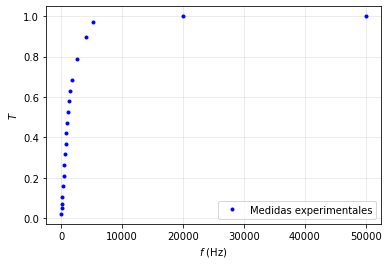

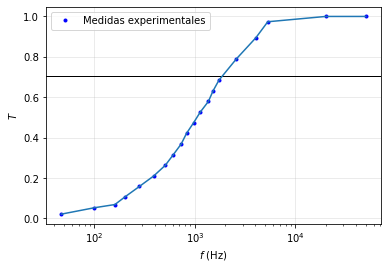

In [79]:
dfalto = read_excel("data.xlsx", sheet_name = "alto").to_numpy()

plt.figure(1)
plt.plot(dfalto[:,0], dfalto[:,2], "b.", label = "Medidas experimentales")
#plt.errorbar(dfalto[:,0], dfalto[:,2], yerr = dfalto[:,4], xerr = None, ls = "none")
plt.grid(alpha = 0.3)
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.legend()


plt.figure(2)
plt.plot(dfalto[:,0], dfalto[:,2], "b.", label = "Medidas experimentales")
#plt.errorbar(dfalto[:,0], dfalto[:,2], yerr = dfalto[:,4], xerr = None, ls = "none")
plt.axhline(y = np.sqrt(2) ** -1, color = 'k', linewidth = 1)
f = interp1d(dfalto[:,0], dfalto[:,2] - np.sqrt(2) ** -1, kind = "cubic")
g = interp1d(dfalto[:,0], dfalto[:,2])
x = my_bisection(f, 1000, 3000, 1e-5)

print(x)
plt.plot(dfalto[:,0], g(dfalto[:,0]))
plt.grid(alpha = 0.3)
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.xscale("log")
plt.legend()

### 3. Filtro pasa banda

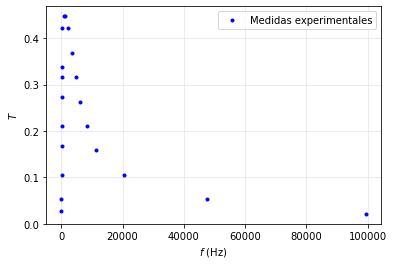

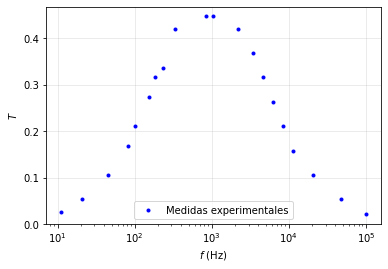

In [25]:
dfbanda = read_excel("data.xlsx", sheet_name = "banda").to_numpy()

plt.figure(1)
plt.plot(dfbanda[:,0], dfbanda[:,2], "b.", label = "Medidas experimentales")
#plt.errorbar(dfbanda[:,0], dfbanda[:,2], yerr = dfbanda[:,4], xerr = None, ls = "none")
plt.grid(alpha = 0.3)
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.legend()


plt.figure(2)
plt.plot(dfbanda[:,0], dfbanda[:,2], "b.", label = "Medidas experimentales")
#plt.errorbar(dfbanda[:,0], dfbanda[:,2], yerr = dfbanda[:,4], xerr = None, ls = "none")
plt.grid(alpha = 0.3)
plt.ylabel("$T$")
plt.xlabel("$f$ (Hz)")
plt.xscale("log")
plt.legend()